In [1737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1738]:
data = pd.read_csv('Covid_stats.csv', encoding='latin1')
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,NaN,NaN,"8,281"


In [1739]:
data_copy = data.copy()

In [1740]:
data_copy.rename(columns={
    'Country,Other': 'Country',
    'Serious,Critical': 'Serious',
    'TotÿCases/1M pop': 'TotalCases_per_1M',
    'Deaths/1M pop': 'Deaths_per_1M',
    'Tests/\n1M pop': 'Tests_per_1M',
    '1 Caseevery X ppl': '1_Case_every_X_ppl',
    '1 Deathevery X ppl': '1_Death_every_X_ppl',
    '1 Testevery X ppl': '1_Test_every_X_ppl', 
    'New Cases/1M pop': 'New_Cases_per_1M',
    'New Deaths/1M pop': 'New_Deaths_per_1M',
    'Active Cases/1M pop': 'Active_Cases_per_1M'
}, inplace=True)
# Handle missing values (impute with 0 for numerical columns)
numerical_cols = data_copy.select_dtypes(include=np.number).columns
data_copy[numerical_cols] = data_copy[numerical_cols].fillna(0)




In [1741]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,"111,820,082",0.00,"1,219,487",0.00,"109,814,428",0.00,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,0.00,0.00,"2,348"
1,India,"45,035,393",0.00,"533,570",0.00,NaN,0.00,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,0.00,0.00,0.4
2,France,"40,138,560",0.00,"167,642",0.00,"39,970,918",0.00,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,0.00,0.00,NaN
3,Germany,"38,828,995",0.00,"183,027",0.00,"38,240,600",0.00,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,0.00,0.00,"4,833"
4,Brazil,"38,743,918",0.00,"711,380",0.00,"36,249,161",0.00,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,0.00,0.00,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,NaN,0.00,NaN,0.00,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,0.00,0.00,0.00,"58,055"
227,Vatican City,29,0.00,NaN,0.00,29,0.00,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,0.00,0.00,0.00,NaN
228,Western Sahara,10,0.00,1,0.00,9,0.00,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",0.00,0.00,0.00,NaN
229,MS Zaandam,9,0.00,2,0.00,7,0.00,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN


In [1742]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    object 
 2   NewCases             231 non-null    float64
 3   TotalDeaths          226 non-null    object 
 4   NewDeaths            231 non-null    float64
 5   TotalRecovered       183 non-null    object 
 6   NewRecovered         231 non-null    float64
 7   ActiveCases          184 non-null    object 
 8   Serious              53 non-null     object 
 9   TotalCases_per_1M    229 non-null    object 
 10  Deaths_per_1M        224 non-null    object 
 11  TotalTests           212 non-null    object 
 12  Tests_per_1M         212 non-null    object 
 13  Population           228 non-null    object 
 14  Continent            228 non-null    object 
 15  1_Case_every_X_ppl   228 non-null    obj

In [1743]:

numeric_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                   'Serious', 'TotalCases_per_1M', 'Deaths_per_1M',
                   'TotalTests', 'Tests_per_1M', 'Population',
                   '1_Case_every_X_ppl', '1_Death_every_X_ppl', '1_Test_every_X_ppl',
                   'New_Cases_per_1M', 'New_Deaths_per_1M', 'Active_Cases_per_1M']

for col in numeric_columns:
    data_copy[col] = data_copy[col].astype(str).str.replace(',', '', regex=False)
    data_copy[col] = pd.to_numeric(data_copy[col], errors='coerce')  # Convert and coerce errors to NaN
    data_copy[col] = data_copy[col].fillna(0) # fill any new NaNs from conversion
        

# Thay thế NaN trong cột string bằng chuỗi rỗng hoặc giá trị mặc định


In [1744]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,111820082,0.00,1219487.00,0.00,109814428.00,0.00,786167.00,940.00,333985.00,...,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,0.00,0.00,2348.00
1,India,45035393,0.00,533570.00,0.00,0.00,0.00,0.00,0.00,32016.00,...,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.00,0.00,0.40
2,France,40138560,0.00,167642.00,0.00,39970918.00,0.00,0.00,0.00,612013.00,...,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00,0.00,0.00
3,Germany,38828995,0.00,183027.00,0.00,38240600.00,0.00,405368.00,0.00,462891.00,...,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,0.00,0.00,4833.00
4,Brazil,38743918,0.00,711380.00,0.00,36249161.00,0.00,1783377.00,0.00,179908.00,...,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,0.00,0.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,0.00,0.00,80.00,0.00,58055.00,...,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,0.00,0.00,29.00,0.00,0.00,0.00,36295.00,...,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00,0.00,0.00
228,Western Sahara,10,0.00,1.00,0.00,9.00,0.00,0.00,0.00,16.00,...,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00,0.00,0.00
229,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [1745]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   NewCases             231 non-null    float64
 3   TotalDeaths          231 non-null    float64
 4   NewDeaths            231 non-null    float64
 5   TotalRecovered       231 non-null    float64
 6   NewRecovered         231 non-null    float64
 7   ActiveCases          231 non-null    float64
 8   Serious              231 non-null    float64
 9   TotalCases_per_1M    231 non-null    float64
 10  Deaths_per_1M        231 non-null    float64
 11  TotalTests           231 non-null    float64
 12  Tests_per_1M         231 non-null    float64
 13  Population           231 non-null    float64
 14  Continent            228 non-null    object 
 15  1_Case_every_X_ppl   231 non-null    flo

In [1746]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_copy.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
count,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00
mean,6099586.48,0.00,60675.71,0.00,5349820.02,6.99,121732.18,163.08,201583.01,1242.52,29725131.23,1987501.42,28123219.61,385.58,12767.25,9.81,0.00,0.00,29283.60
std,47242731.44,0.00,472073.11,0.00,45236680.33,62.22,1461417.48,2289.56,205823.11,1306.51,115130855.57,3550142.80,101662460.65,4126.13,53550.26,25.84,0.00,0.00,91717.16
min,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-168.58
25%,26366.00,0.00,185.50,0.00,2189.50,0.00,0.00,0.00,18412.50,139.50,216878.00,78031.00,406353.00,3.00,457.00,0.00,0.00,0.00,16.50
50%,206897.00,0.00,1974.00,0.00,58947.00,0.00,127.00,0.00,128681.00,788.00,1660662.00,717380.00,5511370.00,7.00,1068.00,1.00,0.00,0.00,323.00
75%,1377176.00,0.00,14688.00,0.00,1042623.50,0.00,2288.50,0.00,328620.50,2040.00,11623027.50,2126400.50,21524803.00,45.50,5522.50,4.50,0.00,0.00,3258.00
max,704753890.00,0.00,7010681.00,0.00,675619811.00,790.00,22123398.00,34794.00,771655.00,6595.00,1186851502.00,23302116.00,1406631776.00,62616.00,626161.00,196.00,0.00,0.00,612553.00


In [1747]:
data_copy.isnull().sum()

Country                0
TotalCases             0
NewCases               0
TotalDeaths            0
NewDeaths              0
TotalRecovered         0
NewRecovered           0
ActiveCases            0
Serious                0
TotalCases_per_1M      0
Deaths_per_1M          0
TotalTests             0
Tests_per_1M           0
Population             0
Continent              3
1_Case_every_X_ppl     0
1_Death_every_X_ppl    0
1_Test_every_X_ppl     0
New_Cases_per_1M       0
New_Deaths_per_1M      0
Active_Cases_per_1M    0
dtype: int64

In [1748]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   NewCases             231 non-null    float64
 3   TotalDeaths          231 non-null    float64
 4   NewDeaths            231 non-null    float64
 5   TotalRecovered       231 non-null    float64
 6   NewRecovered         231 non-null    float64
 7   ActiveCases          231 non-null    float64
 8   Serious              231 non-null    float64
 9   TotalCases_per_1M    231 non-null    float64
 10  Deaths_per_1M        231 non-null    float64
 11  TotalTests           231 non-null    float64
 12  Tests_per_1M         231 non-null    float64
 13  Population           231 non-null    float64
 14  Continent            228 non-null    object 
 15  1_Case_every_X_ppl   231 non-null    flo

In [1749]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,111820082,0.00,1219487.00,0.00,109814428.00,0.00,786167.00,940.00,333985.00,...,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,0.00,0.00,2348.00
1,India,45035393,0.00,533570.00,0.00,0.00,0.00,0.00,0.00,32016.00,...,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.00,0.00,0.40
2,France,40138560,0.00,167642.00,0.00,39970918.00,0.00,0.00,0.00,612013.00,...,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00,0.00,0.00
3,Germany,38828995,0.00,183027.00,0.00,38240600.00,0.00,405368.00,0.00,462891.00,...,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,0.00,0.00,4833.00
4,Brazil,38743918,0.00,711380.00,0.00,36249161.00,0.00,1783377.00,0.00,179908.00,...,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,0.00,0.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,0.00,0.00,80.00,0.00,58055.00,...,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,0.00,0.00,29.00,0.00,0.00,0.00,36295.00,...,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00,0.00,0.00
228,Western Sahara,10,0.00,1.00,0.00,9.00,0.00,0.00,0.00,16.00,...,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00,0.00,0.00
229,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [1750]:
data_copy.dtypes

Country                 object
TotalCases               int64
NewCases               float64
TotalDeaths            float64
NewDeaths              float64
TotalRecovered         float64
NewRecovered           float64
ActiveCases            float64
Serious                float64
TotalCases_per_1M      float64
Deaths_per_1M          float64
TotalTests             float64
Tests_per_1M           float64
Population             float64
Continent               object
1_Case_every_X_ppl     float64
1_Death_every_X_ppl    float64
1_Test_every_X_ppl     float64
New_Cases_per_1M       float64
New_Deaths_per_1M      float64
Active_Cases_per_1M    float64
dtype: object

In [1751]:
print(data_copy['TotalCases'])

0      111820082
1       45035393
2       40138560
3       38828995
4       38743918
         ...    
226           80
227           29
228           10
229            9
230    704753890
Name: TotalCases, Length: 231, dtype: int64


In [1752]:
data_copy.describe(include=['float64','int64'])

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
count,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00
mean,6099586.48,0.00,60675.71,0.00,5349820.02,6.99,121732.18,163.08,201583.01,1242.52,29725131.23,1987501.42,28123219.61,385.58,12767.25,9.81,0.00,0.00,29283.60
std,47242731.44,0.00,472073.11,0.00,45236680.33,62.22,1461417.48,2289.56,205823.11,1306.51,115130855.57,3550142.80,101662460.65,4126.13,53550.26,25.84,0.00,0.00,91717.16
min,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-168.58
25%,26366.00,0.00,185.50,0.00,2189.50,0.00,0.00,0.00,18412.50,139.50,216878.00,78031.00,406353.00,3.00,457.00,0.00,0.00,0.00,16.50
50%,206897.00,0.00,1974.00,0.00,58947.00,0.00,127.00,0.00,128681.00,788.00,1660662.00,717380.00,5511370.00,7.00,1068.00,1.00,0.00,0.00,323.00
75%,1377176.00,0.00,14688.00,0.00,1042623.50,0.00,2288.50,0.00,328620.50,2040.00,11623027.50,2126400.50,21524803.00,45.50,5522.50,4.50,0.00,0.00,3258.00
max,704753890.00,0.00,7010681.00,0.00,675619811.00,790.00,22123398.00,34794.00,771655.00,6595.00,1186851502.00,23302116.00,1406631776.00,62616.00,626161.00,196.00,0.00,0.00,612553.00


In [1753]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,111820082,0.00,1219487.00,0.00,109814428.00,0.00,786167.00,940.00,333985.00,...,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,0.00,0.00,2348.00
1,India,45035393,0.00,533570.00,0.00,0.00,0.00,0.00,0.00,32016.00,...,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.00,0.00,0.40
2,France,40138560,0.00,167642.00,0.00,39970918.00,0.00,0.00,0.00,612013.00,...,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00,0.00,0.00
3,Germany,38828995,0.00,183027.00,0.00,38240600.00,0.00,405368.00,0.00,462891.00,...,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,0.00,0.00,4833.00
4,Brazil,38743918,0.00,711380.00,0.00,36249161.00,0.00,1783377.00,0.00,179908.00,...,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,0.00,0.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,0.00,0.00,80.00,0.00,58055.00,...,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,0.00,0.00,29.00,0.00,0.00,0.00,36295.00,...,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00,0.00,0.00
228,Western Sahara,10,0.00,1.00,0.00,9.00,0.00,0.00,0.00,16.00,...,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00,0.00,0.00
229,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [1769]:
Asia = data_copy.loc[data_copy['Continent'] == 'Asia'].count()
Asia


Country                49
TotalCases             49
NewCases               49
TotalDeaths            49
NewDeaths              49
TotalRecovered         49
NewRecovered           49
ActiveCases            49
Serious                49
TotalCases_per_1M      49
Deaths_per_1M          49
TotalTests             49
Tests_per_1M           49
Population             49
Continent              49
1_Case_every_X_ppl     49
1_Death_every_X_ppl    49
1_Test_every_X_ppl     49
New_Cases_per_1M       49
New_Deaths_per_1M      49
Active_Cases_per_1M    49
dtype: int64

In [1764]:

data_copy['1_Case_every_X_ppl'].describe()

count     231.00
mean      385.58
std      4126.13
min         0.00
25%         3.00
50%         7.00
75%        45.50
max     62616.00
Name: 1_Case_every_X_ppl, dtype: float64

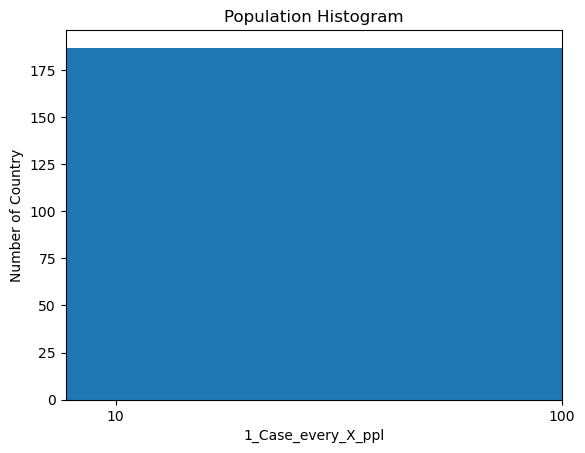

In [1765]:
import matplotlib.pyplot as plt
plt.hist(data_copy['1_Case_every_X_ppl'], bins=500)

plt.xticks([10, 100, 10000, 100000, 1000000, 10000000, 100000000, 300000000])  # Nhãn logarit

plt.xlabel('1_Case_every_X_ppl')
plt.ylabel('Number of Country')
plt.title('Population Histogram')
plt.xlim(0, 100)

plt.show()